In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data = pd.read_csv('./data/simple_data.csv')
data.head()


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2.0,0.0,AMETHYSTS,10002.0,1.0,9996.0,2.0,9995.0,29.0,10004.0,2.0,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-2.0,0.0,STARFRUIT,5002.0,1.0,4997.0,31.0,NaN,NaN,5003.0,31.0,NaN,NaN,NaN,NaN,5002.5,0.0
2,-2.0,100.0,AMETHYSTS,9996.0,2.0,9995.0,22.0,NaN,NaN,10004.0,2.0,10005.0,22.0,NaN,NaN,10000.0,0.0
3,-2.0,100.0,STARFRUIT,4997.0,24.0,NaN,NaN,NaN,NaN,5003.0,2.0,5004.0,22.0,NaN,NaN,5000.0,0.0
4,-2.0,200.0,STARFRUIT,4997.0,2.0,4996.0,20.0,NaN,NaN,5003.0,20.0,NaN,NaN,NaN,NaN,5000.0,0.0


In [6]:
starfruit_data = data[data['product'] == 'STARFRUIT']
amethyst_data = data[data['product'] == 'AMETHYSTS']

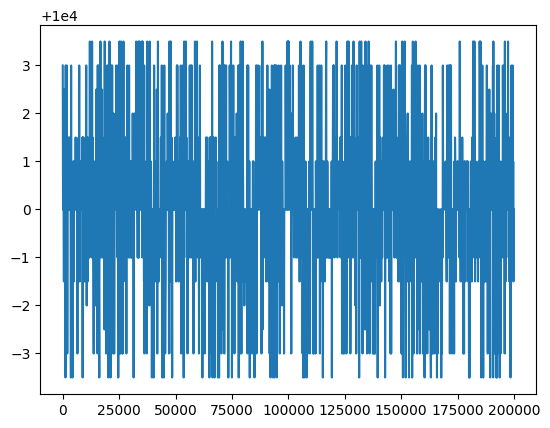

In [77]:
plt.plot(amethyst_data['timestamp'], amethyst_data['mid_price'])

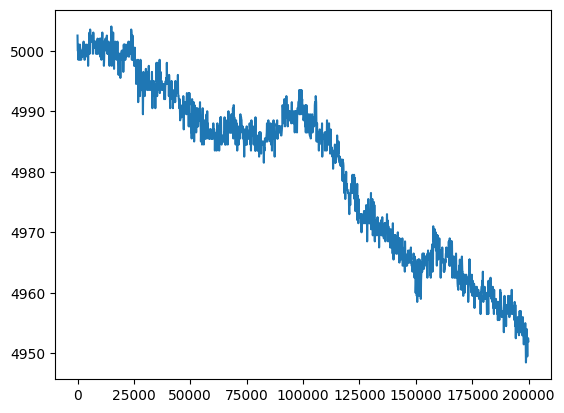

In [10]:
plt.plot(starfruit_data['timestamp'], starfruit_data['mid_price'])

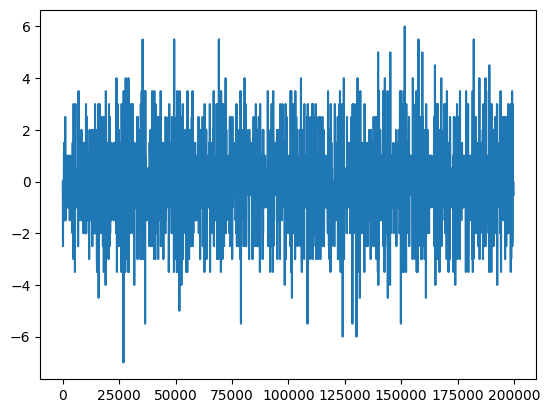

In [44]:
mid_price_diff = starfruit_data['mid_price'].diff()
mid_price_diff[1] = 0
plt.plot(starfruit_data['timestamp'], mid_price_diff)

-0.02525

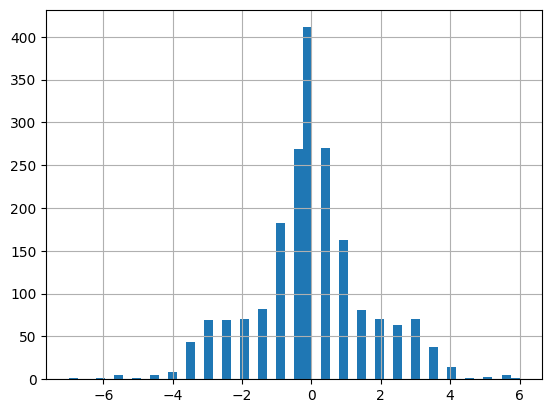

In [45]:
mid_price_diff.hist(bins=50)
mid_price_diff.mean()

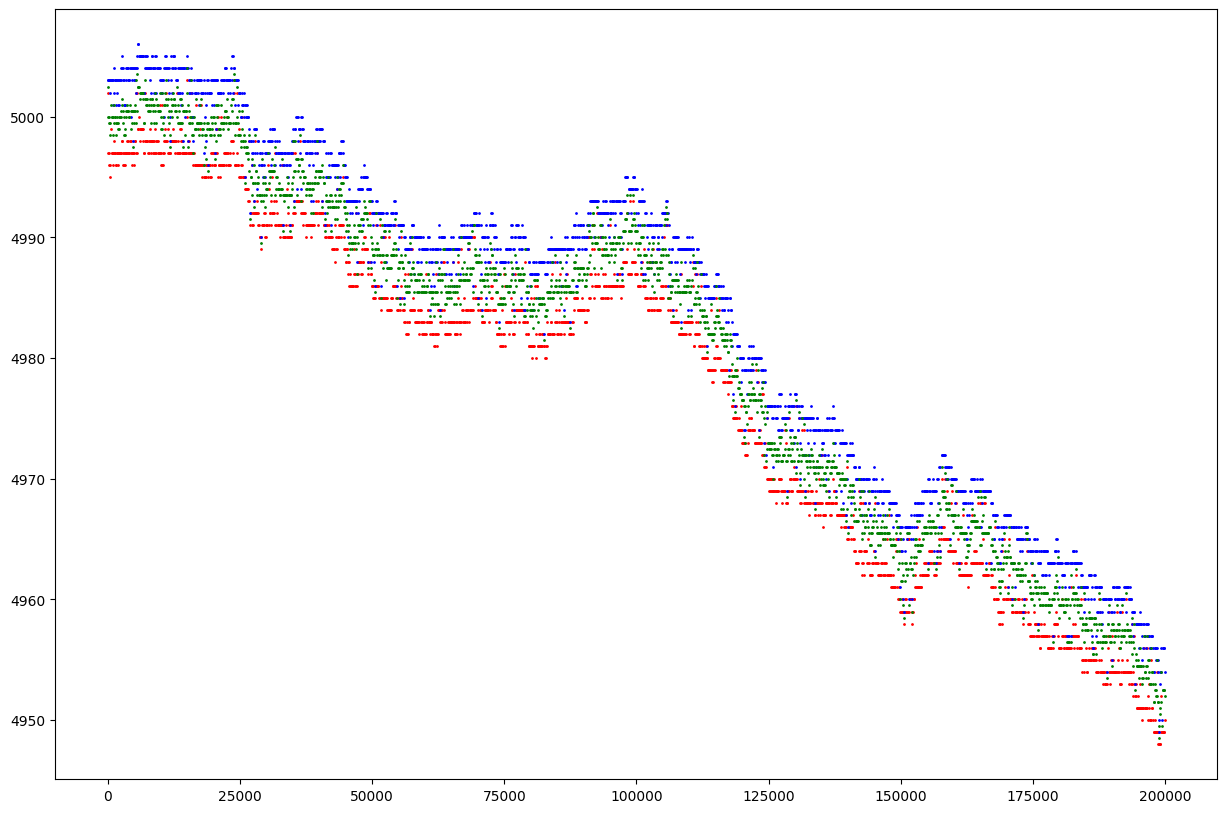

In [26]:
plt.figure(figsize=(15, 10))
plt.scatter(starfruit_data['timestamp'], starfruit_data['bid_price_1'], color = 'red', s=1)
plt.scatter(starfruit_data['timestamp'], starfruit_data['ask_price_1'], color = 'blue', s=1)
plt.scatter(starfruit_data['timestamp'], starfruit_data['mid_price'], color = 'green', s=1)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

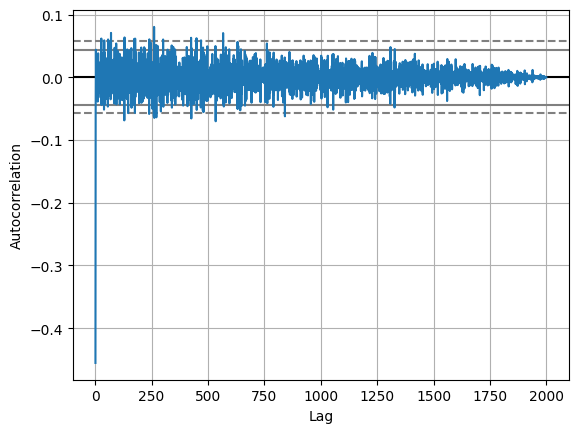

In [48]:
# plot autocorrections for different lags
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(mid_price_diff, ax=plt.gca())

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 3.14004229e-02,  1.98389491e-02, -2.88811912e-02, -1.79945117e-04,
        -6.74794188e-03,  1.27761033e-02, -1.62850331e-02,  4.40865536e-02,
        -5.15092897e-02, -4.55261145e-01,  1.00000000e+00, -4.55261145e-01,
        -5.15092897e-02,  4.40865536e-02, -1.62850331e-02,  1.27761033e-02,
        -6.74794188e-03, -1.79945117e-04, -2.88811912e-02,  1.98389491e-02,
         3.14004229e-02]),
 <matplotlib.lines.Line2D at 0x78d56ced7ee0>)

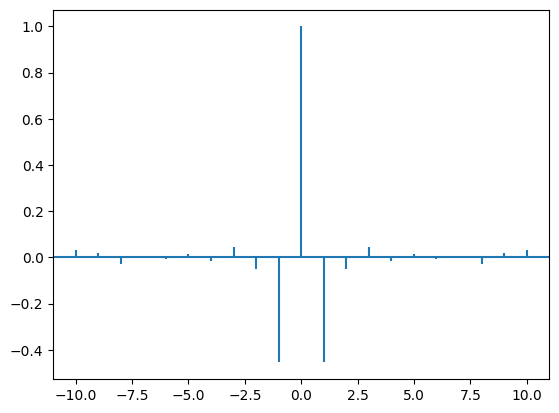

In [61]:
plt.acorr(mid_price_diff, maxlags=10)


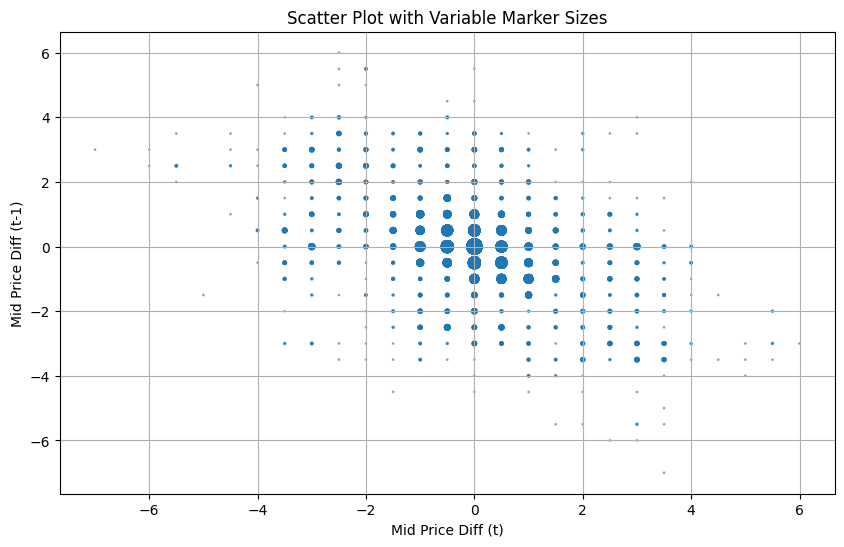

In [67]:
# plot the next diff against the current diff
x = mid_price_diff[1:]
y = mid_price_diff[:-1]

# Calculate the frequencies of each unique point pair
counts = {}
for point in zip(x, y):
    if point in counts:
        counts[point] += 1
    else:
        counts[point] = 1

sizes = []
for point in zip(x, y):
    sizes.append(counts[point])
    
# Plot scatter with different marker sizes
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=sizes, alpha=0.5)

plt.title('Scatter Plot with Variable Marker Sizes')
plt.xlabel('Mid Price Diff (t)')
plt.ylabel('Mid Price Diff (t-1)')
plt.grid(True)

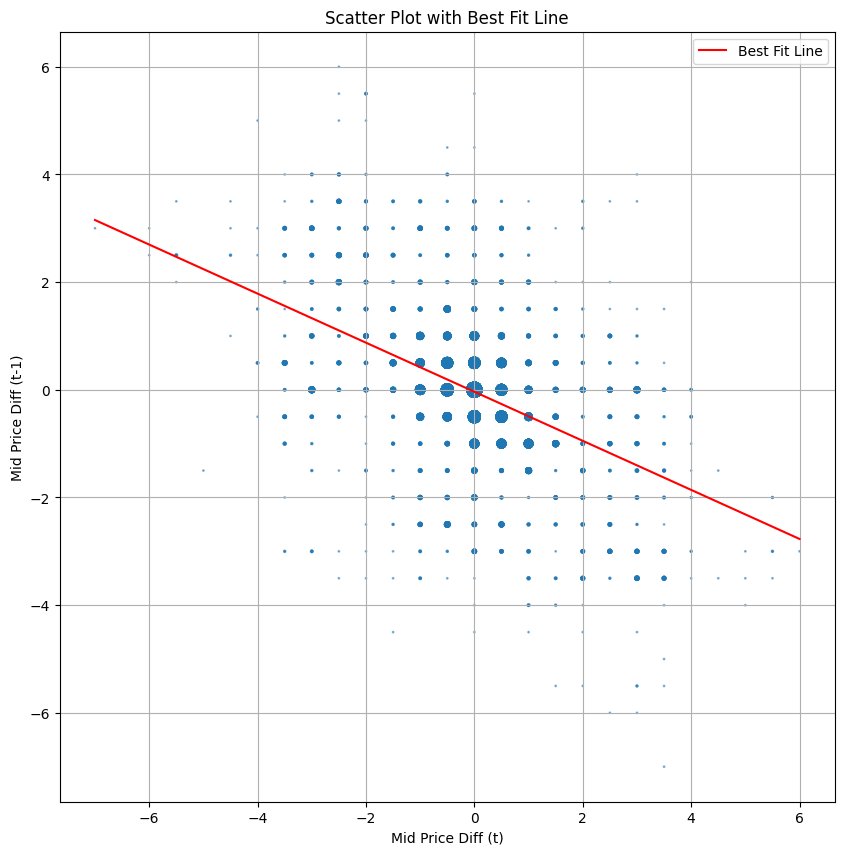

array([-0.45559303])

In [75]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(np.array(x).reshape(-1, 1), y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = model.predict(xfit[:, np.newaxis])

# Plot scatter with different marker sizes
plt.figure(figsize=(10, 10))
plt.scatter(x, y, s=sizes, alpha=0.5)
plt.plot(xfit, yfit, color='red', label='Best Fit Line')

plt.title('Scatter Plot with Best Fit Line')
plt.xlabel('Mid Price Diff (t)')
plt.ylabel('Mid Price Diff (t-1)')
plt.legend()
plt.grid(True)
plt.show()

model.coef_

In [79]:
rdata = pd.read_csv('./data/r_trader_data.csv', delimiter=';')
rdata.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5002.5,0.0
2,-2,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,0.0
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,0.0
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,20,NaN,NaN,NaN,NaN,5000.0,0.0


In [80]:
st_rdata = rdata[rdata['product'] == 'STARFRUIT']

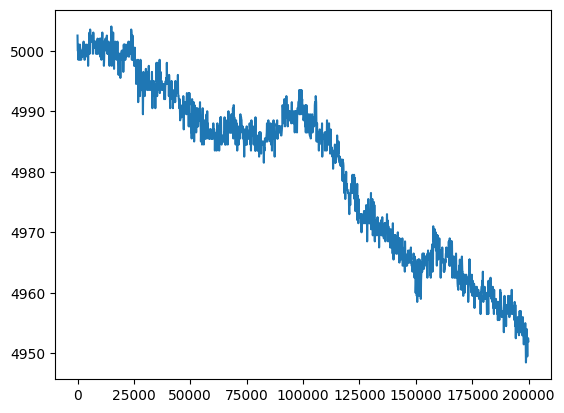

In [85]:
plt.plot(st_rdata['timestamp'], st_rdata['mid_price'])
rmp_diff = st_rdata['mid_price'].diff()
rmp_diff[1] = 0

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 3.14004229e-02,  1.98389491e-02, -2.88811912e-02, -1.79945117e-04,
        -6.74794188e-03,  1.27761033e-02, -1.62850331e-02,  4.40865536e-02,
        -5.15092897e-02, -4.55261145e-01,  1.00000000e+00, -4.55261145e-01,
        -5.15092897e-02,  4.40865536e-02, -1.62850331e-02,  1.27761033e-02,
        -6.74794188e-03, -1.79945117e-04, -2.88811912e-02,  1.98389491e-02,
         3.14004229e-02]),
 <matplotlib.lines.Line2D at 0x78d551f7cfd0>)

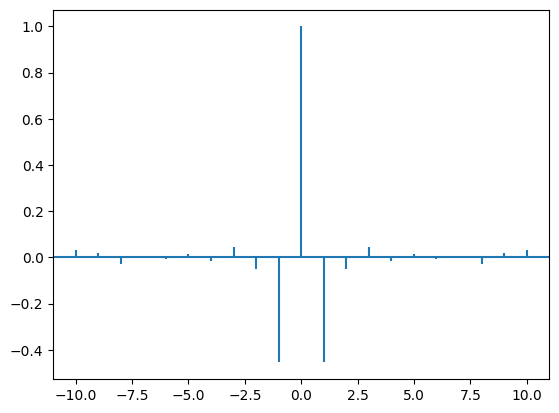

In [86]:
plt.acorr(rmp_diff, maxlags=10)

array([-0.45559303])

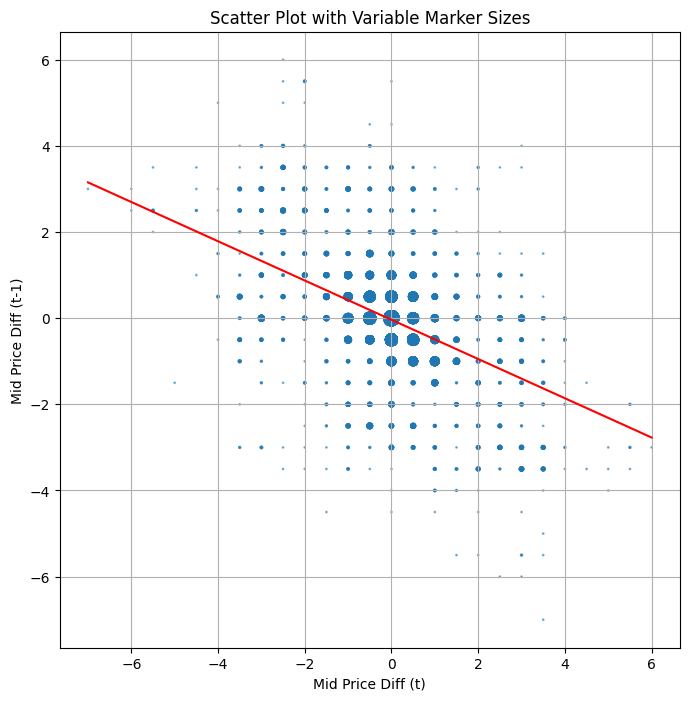

In [89]:
# plot the next diff against the current diff
x = mid_price_diff[1:]
y = mid_price_diff[:-1]

# Calculate the frequencies of each unique point pair
counts = {}
for point in zip(x, y):
    if point in counts:
        counts[point] += 1
    else:
        counts[point] = 1

sizes = []
for point in zip(x, y):
    sizes.append(counts[point])
    
# Plot scatter with different marker sizes
plt.figure(figsize=(8, 8))
plt.scatter(x, y, s=sizes, alpha=0.5)

model = LinearRegression()
model.fit(np.array(x).reshape(-1, 1), y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.plot(xfit, yfit, color='red', label='Best Fit Line')


plt.title('Scatter Plot with Variable Marker Sizes')
plt.xlabel('Mid Price Diff (t)')
plt.ylabel('Mid Price Diff (t-1)')
plt.grid(True)

model.coef_